## Explanatory data visualization

We create graphs for others to inform, make a point, or tell a story.

## Design for audience
### The familiarity principle

Let's say we're data journalists, and we're working on an article about the coronavirus. Our goal is to make readers more aware of how devastating this virus is — the assumption is that we're writing the article in December 2020, when the coronavirus was still fairly new.

Although unpleasant, we want to make readers more aware that people are dying because of this virus. To that end, we want to include a graph in the article that shows the top 20 countries by the number of deaths.

## Dataset

In [1]:
import pandas as pd
top20_deathtoll = pd.read_csv('/Users/brindhamanivannan/Desktop/data-projects/datasets/top20_deathtoll.csv')
top20_deathtoll

,Country_Other,Total_Deaths
0,Turkey,15103.0
1,Chile,15663.0
2,Belgium,17386.0
3,Indonesia,18000.0
4,Germany,19539.0
5,Poland,20592.0
6,South Africa,22249.0
7,Peru,36324.0
8,Colombia,37995.0
9,Argentina,39888.0


First, we need to decide which type of graph to use. To make a good decision, we need to choose a graph that our audience can easily understand.

Ease of understanding often comes from familiarity. If people already know how to read a bar plot, they can immediately start reading the data on the graph. If they aren't familiar with a bar plot, they first need to figure out how to read one.

The familiarity principle typically favors simple graphs over complicated, eye-catching graphs. As data scientists, we use visuals to communicate data correctly and efficiently. Our primary aim is not to impress the audience on artistic grounds.

To display the top 20 countries by number of deaths, a horizontal bar plot should work well enough — let's assume our audience is familiar with this kind of graph.

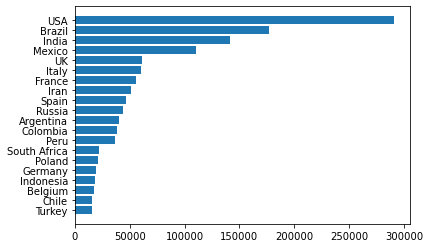

In [2]:
import matplotlib.pyplot as plt
plt.barh(top20_deathtoll['Country_Other'],
         top20_deathtoll['Total_Deaths'])
plt.show()

This graph is our starting point. 

## Matplotlib's object-oriented interface

Matplotlib has two interfaces:

- A functional interface: we use functions to create and modify plots.
- An object-oriented (OO) interface: we use methods to create and modify plots.

We use the functional approach when we call the function plt.barh(). We also use this approach extensively when we create and modify graphs using functions from the matplotlib.pyplot submodule: plt.plot(), plt.scatter(), plt.title(), plt.xlim(), etc.

The functional interface is simpler and easier to use. It comes in handy in the exploratory data visualization workflow, where we need to create graphs fast. But the OO interface offers more power and flexibility in graph editing.

## The OO interface

To create a graph using the OO interface, we use the plt.subplots() function, which generates an empty plot and returns a tuple of two objects:

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

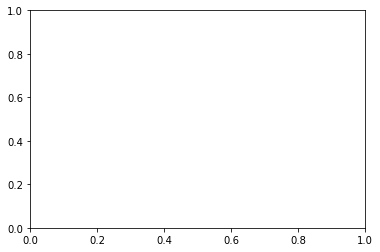

In [3]:
plt.subplots()

We assign the two objects inside the tuple to variables fig and ax:

<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


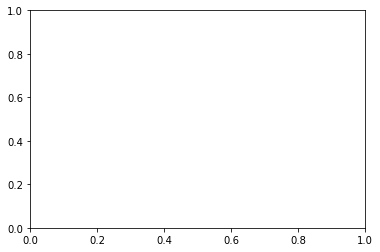

In [4]:
fig, ax = plt.subplots()
print(type(fig))
print(type(ax))

The matplotlib.figure.Figure object acts as a canvas on which we can add one or more plots. The matplotlib.axes._subplots.AxesSubplot object is the actual plot. In short, we have two objects:

- The Figure (the canvas)
- The Axes (the plot; don't confuse with "axis," which is the x- and y-axis of a plot).
            
To create a bar plot, we use the Axes.bar() method and call plt.show() to :

<BarContainer object of 3 artists>

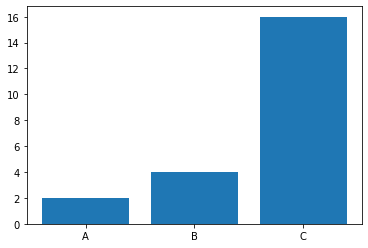

In [5]:
fig, ax = plt.subplots()
ax.bar(['A', 'B', 'C'],
       [2, 4, 16])

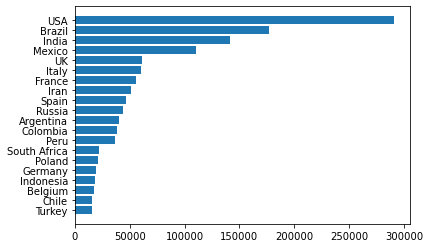

In [6]:
fig, ax = plt.subplots()
ax.barh(top20_deathtoll['Country_Other'],
        top20_deathtoll['Total_Deaths'])
plt.show()

In the last exercise, we used the OO approach to recreate the horizontal bar plot. We know that a large part of our audience will read the article on a mobile device. This means our graph needs to have mobile-friendly proportions: small width, larger height. Our graph currently has a small height and a larger width.

## Mobile-friendly proportions

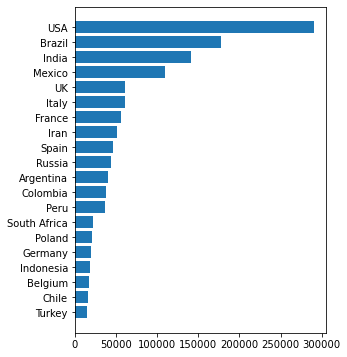

In [7]:
fig, ax = plt.subplots(figsize=(4.5, 6))
ax.barh(top20_deathtoll['Country_Other'],
         top20_deathtoll['Total_Deaths'])
plt.show()

## Maximizing data-ink

Generally, a graph has three elements:

- Data elements: the numbers and the categories visually represented and the relationships between them.
- Structural elements: the axes, the ticks, the legend, the grid, etc.
- Decorations: extra colors, shapes, artistic drawings etc.
    
Maximizing the data elements ensures the audience's attention is on the data — not on structure or decorations. 

Edward Tufte theorized the principle of maximizing data elements in his book The Visual Display of Quantitative Information (1983). From the total amount of ink used for printing a graph, some of the ink goes to show the data — that is the data-ink. As a sidenote, Tufte worked on his book in the 1980s, when most graphs were printed on paper using ink.

Tufte named the principle of maximizing data elements as maximizing the data-ink ratio. The data-ink ratio is the proportion of data-ink from the total ink:

Data-ink ratio = data-ink / total ink used to print the graph

A graph with many decorations and structural parts has a low data-ink ratio. A graph where data-ink prevails has a greater data-ink ratio. 

We should try to maximize the data-ink ratio within reason. Some structural elements are necessary; otherwise, the graph can become unreadable. Decorations are optional by definition, but they can help prove a point in some cases. 

To maximize data ink, we can do the following:

- Erase non-data ink
- Erase redundant data-ink

We begin by identifying the data-ink that we can't remove without losing information (this is the core of the graph):

- The bars
- The y-tick labels (the country names)
- The x-tick labels (the number of deaths)

There are two structural elements that constitute non-data ink — we can remove them without losing any important information:

- The axes
- The ticks

To remove the axes (also called spines), we can use the Axes.spines[position].set_visible(bool) method, where position is a string indicating the location of the axis: 'left', 'right', 'top', and 'bottom'. For instance, this is how we remove the left and the bottom spines.

https://matplotlib.org/stable/api/_as_gen/matplotlib.artist.Artist.set_visible.html

If we want to remove all the spines, the fastest way is to use a for loop.

To remove the ticks, we can use the Axes.tick_params(bottom, top, left, right) method. Below, we only need to remove the left and bottom ticks:

https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html

## Erasing non-data ink

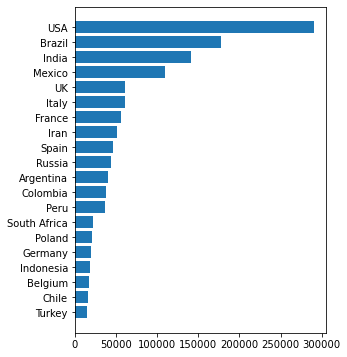

In [8]:
fig, ax = plt.subplots(figsize=(4.5, 6))
ax.barh(top20_deathtoll['Country_Other'],
         top20_deathtoll['Total_Deaths'])

plt.show()

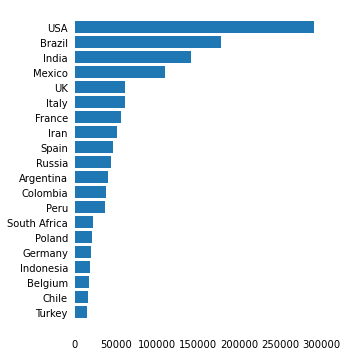

In [9]:
fig, ax = plt.subplots(figsize=(4.5, 6))
ax.barh(top20_deathtoll['Country_Other'],
         top20_deathtoll['Total_Deaths'])

#Remove all 4 spines from the horizontal bar plot 
for location in ['left','right','bottom','top']:
    ax.spines[location].set_visible(False)
    
#Remove the bottom and left ticks from the horizontal bar plot 
ax.tick_params(bottom=False, left=False)

plt.show()

## Erasing redundant data-ink

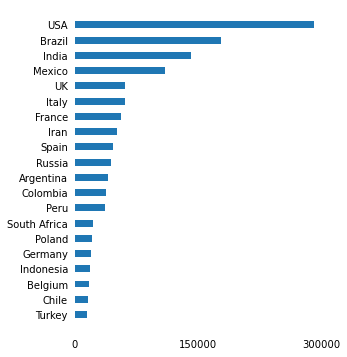

In [10]:
fig, ax = plt.subplots(figsize=(4.5, 6))
ax.barh(top20_deathtoll['Country_Other'],
        top20_deathtoll['Total_Deaths'],
        height=0.45) # Reduce the thickness of each bar to a value of 0.45

for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_visible(False)
ax.tick_params(bottom=False, left=False)
ax.set_xticks([0, 150000, 300000]) # Keep only 0, 150000, and 300000 as x-tick labels
plt.show()

So far, we've applied two design principles:

- We chose a horizontal bar graph using the familiarity principle.
- We modified the graph using the maximizing data-ink ratio principle.

Another aspect that we need to consider is the audience's direction of reading. As they scroll down through our article, they will read (and look at) our graph from top to bottom. More specifically, people usually start from top left and follow a zigzag pattern until they reach bottom right.

One problem with our graph is that the tick labels are located at the bottom. People will immediately see the country names, the bars, but they may get confused about the quantities.

To address that, we're going to move the tick labels at the top of the graph using the Axes.xaxis.tick_top() method:


## The direction of reading

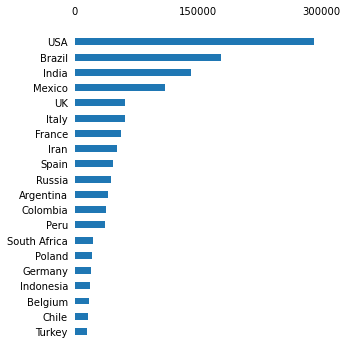

In [11]:
fig, ax = plt.subplots(figsize=(4.5, 6))
ax.barh(top20_deathtoll['Country_Other'],
        top20_deathtoll['Total_Deaths'],
        height=0.45) # Reduce the thickness of each bar to a value of 0.45

for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_visible(False)

ax.set_xticks([0, 150000, 300000])# Keep only 0, 150000, and 300000 as x-tick labels
ax.xaxis.tick_top()
ax.tick_params(top=False, left=False)
plt.show()


Right now, the first thing people will probably see are the x-tick labels. We want readers to focus on the data, so we'll do two things:

- We'll color the x-tick labels in grey so they don't stand out visually so much.
- We'll color the bars in a shade of red.

To color the x-tick labels, we use the same Axes.tick_params() method. However, we need to call it one more time because we only want to modify the ticks of the x-axis.

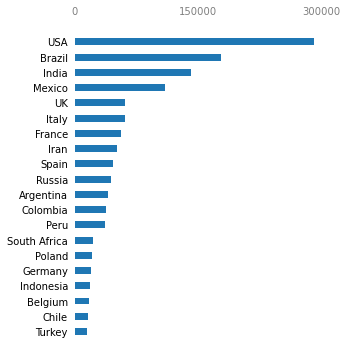

In [12]:
fig, ax = plt.subplots(figsize=(4.5, 6))
ax.barh(top20_deathtoll['Country_Other'],
        top20_deathtoll['Total_Deaths'],
        height=0.45) # Reduce the thickness of each bar to a value of 0.45

for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_visible(False)

ax.set_xticks([0, 150000, 300000])# Keep only 0, 150000, and 300000 as x-tick labels
ax.xaxis.tick_top()
ax.tick_params(top=False, left=False)
ax.tick_params(axis='x', colors='grey')
plt.show()

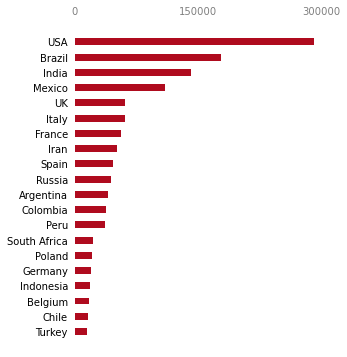

In [13]:
fig, ax = plt.subplots(figsize=(4.5, 6))
ax.barh(top20_deathtoll['Country_Other'],
        top20_deathtoll['Total_Deaths'],
        height=0.45, color='#af0b1e') # Reduce the thickness of each bar to a value of 0.45

for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_visible(False)

ax.set_xticks([0, 150000, 300000])# Keep only 0, 150000, and 300000 as x-tick labels
ax.xaxis.tick_top()
ax.tick_params(top=False, left=False)
ax.tick_params(axis='x', colors='grey')

plt.show()

If someone looks at our graph, they won't be able to tell what the quantity means. They see the USA has almost 300,000 of something, but what is that something?

Instead of adding an x-axis label, we'll use the title and subtitle area to give the readers the necessary details. More specifically, we will do the following:

- Add a subtitle that explains what the quantity describes and when the data was collected.
- Use the title to show readers more data — we'll report that the death toll worldwide has surpassed 1.5M (data source: Worldometers).

Generally, the title must be data ink. If we need to give structural explanations in text, we can use the subtitle. That's because the title is always so noticeable, and we need to leverage that to show more data (and also maximize the data-ink ratio).

## Title and subtitle

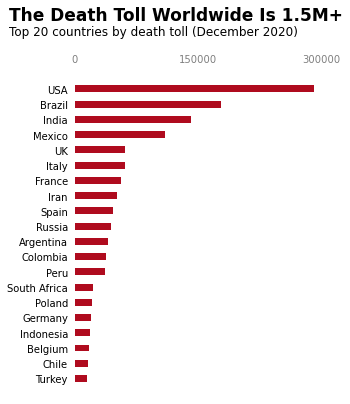

In [14]:
fig, ax = plt.subplots(figsize=(4.5, 6))
ax.barh(top20_deathtoll['Country_Other'],
        top20_deathtoll['Total_Deaths'],
        height=0.45, color='#af0b1e')
for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_visible(False)
ax.set_xticks([0, 150000, 300000])
ax.xaxis.tick_top()
ax.tick_params(top=False, left=False)
ax.tick_params(axis='x', colors='grey')
# *** *** *** *** *** *** *** *** *** ***

# Title n subtitle
ax.text(x=-80000, y=23.5,
        s='The Death Toll Worldwide Is 1.5M+',
        weight='bold', size=17)
ax.text(x=-80000, y=22.5,
        s='Top 20 countries by death toll (December 2020)',
        size=12)

plt.show()

We've come a long way and created a graph that's almost publication-ready.

Next, we're only going to give it some final touches. First, we'll make the y-tick labels easier to read. We'll add a comma to both 150000 and 300000 to make them more readable — so people don't have to struggle to tell whether it's a 30,000 or a 300,000, for instance.

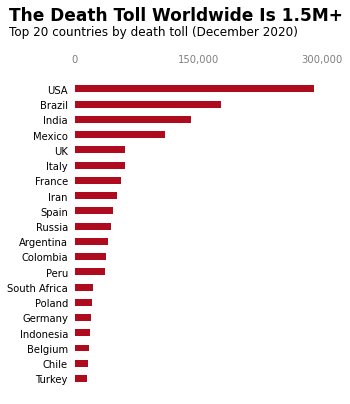

In [15]:
fig, ax = plt.subplots(figsize=(4.5, 6))
ax.barh(top20_deathtoll['Country_Other'],
        top20_deathtoll['Total_Deaths'],
        height=0.45, color='#af0b1e')
for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_visible(False)
ax.set_xticks([0, 150000, 300000])
ax.xaxis.tick_top()
ax.tick_params(top=False, left=False)
ax.tick_params(axis='x', colors='grey')
# *** *** *** *** *** *** *** *** *** ***

# Title n subtitle
ax.text(x=-80000, y=23.5,
        s='The Death Toll Worldwide Is 1.5M+',
        weight='bold', size=17)
ax.text(x=-80000, y=22.5,
        s='Top 20 countries by death toll (December 2020)',
        size=12)

ax.set_xticklabels(['0', '150,000', '300,000'])
plt.show()

Next, we're going to left-align the y-tick labels (the country names). To do that, we're going to leverage the flexibility of the Axes.text() method. First, however, we're going to remove the current labels using the Axes.set_yticklabels() method.

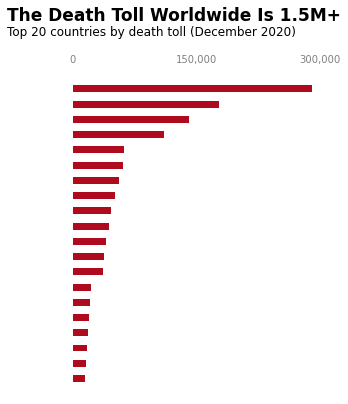

In [16]:
fig, ax = plt.subplots(figsize=(4.5, 6))
ax.barh(top20_deathtoll['Country_Other'],
        top20_deathtoll['Total_Deaths'],
        height=0.45, color='#af0b1e')
for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_visible(False)
ax.set_xticks([0, 150000, 300000])
ax.xaxis.tick_top()
ax.tick_params(top=False, left=False)
ax.tick_params(axis='x', colors='grey')
# *** *** *** *** *** *** *** *** *** ***

# Title n subtitle
ax.text(x=-80000, y=23.5,
        s='The Death Toll Worldwide Is 1.5M+',
        weight='bold', size=17)
ax.text(x=-80000, y=22.5,
        s='Top 20 countries by death toll (December 2020)',
        size=12)

ax.set_xticklabels(['0', '150,000', '300,000'])
ax.set_yticklabels([]) # an empty list removes the labels
plt.show()

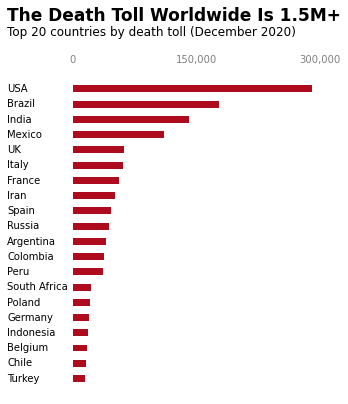

In [17]:
fig, ax = plt.subplots(figsize=(4.5, 6))
ax.barh(top20_deathtoll['Country_Other'],
        top20_deathtoll['Total_Deaths'],
        height=0.45, color='#af0b1e')
for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_visible(False)
ax.set_xticks([0, 150000, 300000])
ax.xaxis.tick_top()
ax.tick_params(top=False, left=False)
ax.tick_params(axis='x', colors='grey')
# *** *** *** *** *** *** *** *** *** ***

# Title n subtitle
ax.text(x=-80000, y=23.5,
        s='The Death Toll Worldwide Is 1.5M+',
        weight='bold', size=17)
ax.text(x=-80000, y=22.5,
        s='Top 20 countries by death toll (December 2020)',
        size=12)

ax.set_xticklabels(['0', '150,000', '300,000'])
ax.set_yticklabels([]) # an empty list removes the labels

country_names = top20_deathtoll['Country_Other']
for i, country in zip(range(20), country_names):
    ax.text(x=-80000, y=i-0.15, s=country)
    
plt.show()

Readers who explore the graph will try to determine the approximate death toll for each country. To help them, we're going to draw a vertical line below the 150,000 value. To do that, we use the Axes.axvline(x) method, where x is the x-coordinate where the line begins:

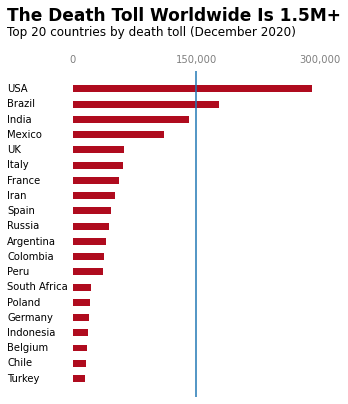

In [18]:
fig, ax = plt.subplots(figsize=(4.5, 6))
ax.barh(top20_deathtoll['Country_Other'],
        top20_deathtoll['Total_Deaths'],
        height=0.45, color='#af0b1e')
for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_visible(False)
ax.set_xticks([0, 150000, 300000])
ax.xaxis.tick_top()
ax.tick_params(top=False, left=False)
ax.tick_params(axis='x', colors='grey')
# *** *** *** *** *** *** *** *** *** ***

# Title n subtitle
ax.text(x=-80000, y=23.5,
        s='The Death Toll Worldwide Is 1.5M+',
        weight='bold', size=17)
ax.text(x=-80000, y=22.5,
        s='Top 20 countries by death toll (December 2020)',
        size=12)

ax.set_xticklabels(['0', '150,000', '300,000'])
ax.set_yticklabels([]) # an empty list removes the labels

country_names = top20_deathtoll['Country_Other']
for i, country in zip(range(20), country_names):
    ax.text(x=-80000, y=i-0.15, s=country)
 
ax.axvline(x=150000)
plt.show()

The color of the vertical line is too bright and stands out more than we want. Moreover, the line spans too far vertically and isn't on the same line with the Turkey label. To fix these problems, we're going to use the following:

- The ymin parameter to make it shorter — where 0 is the bottom of the plot, and 1 is the top of the plot.
- The c parameter to change the color to 'grey'.
- The alpha parameter to add transparency to the line.

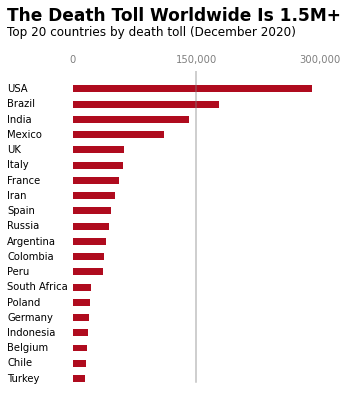

In [19]:
fig, ax = plt.subplots(figsize=(4.5, 6))
ax.barh(top20_deathtoll['Country_Other'],
        top20_deathtoll['Total_Deaths'],
        height=0.45, color='#af0b1e')
for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_visible(False)
ax.set_xticks([0, 150000, 300000])
ax.xaxis.tick_top()
ax.tick_params(top=False, left=False)
ax.tick_params(axis='x', colors='grey')
# *** *** *** *** *** *** *** *** *** ***

# Title n subtitle
ax.text(x=-80000, y=23.5,
        s='The Death Toll Worldwide Is 1.5M+',
        weight='bold', size=17)
ax.text(x=-80000, y=22.5,
        s='Top 20 countries by death toll (December 2020)',
        size=12)

ax.set_xticklabels(['0', '150,000', '300,000'])
ax.set_yticklabels([]) # an empty list removes the labels

country_names = top20_deathtoll['Country_Other']
for i, country in zip(range(20), country_names):
    ax.text(x=-80000, y=i-0.15, s=country)
ax.axvline(x=150000, ymin=0.045, c='grey', alpha=0.5)
plt.show()


Our final graph above presents facts.